In [1]:
import os
print("Current_Working_Directory:", os.getcwd())

Current_Working_Directory: C:\Users\viraj\Code_a\Machine_learning\Random_Forest


In [2]:
directory_path = "C:/Users/viraj/Code_a/Machine_learning/Random_Forest"
contents = os.listdir(directory_path)
print("Contents")
for i in contents:
    print(i)

Contents
.ipynb_checkpoints
CreditCard.csv
Random_Forest.ipynb
Untitled.ipynb


### Introduction

Random forests are like a crowd of decision-making trees working together to provide accurate predictions. They're used in supervised learning, where we have labeled data to learn from. Whether we're trying to predict numbers (like prices) or categories (like whether an email is spam or not), random forests can handle it.

Here's how they work: Imagine we're making a big decision, like what movie to watch. We might ask different friends for advice. Each friend (or "tree" in our case) has their own perspective, but together, they give us a better idea of what we might enjoy.

Similarly, random forests create a bunch of decision trees, each trained on a random subset of the data. Each tree votes on the outcome, and then the forest combines these votes to make a final decision. This teamwork helps improve accuracy and prevents overfitting (where the model memorizes the training data instead of learning from it).

So, whether you're predicting prices or sorting emails, random forests harness the power of many decision trees to make reliable predictions.

In [3]:
#Import the Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#reading the File
df=pd.read_csv("C:/Users/viraj/Code_a/Machine_learning/Random_Forest/CreditCard.csv") 

In [5]:
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
1,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
2,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
3,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
4,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1315,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1316,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1317,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


Lets Start with Feature Engineering

#### Feature Engineering

In [6]:
df.shape

(1319, 12)

In [7]:
df.describe()

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


In [8]:
df.dtypes

card            object
reports          int64
age            float64
income         float64
share          float64
expenditure    float64
owner           object
selfemp         object
dependents       int64
months           int64
majorcards       int64
active           int64
dtype: object

In [9]:
df.isnull().sum()

card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

In [10]:
categorical = [col for col in df.columns if df[col].dtypes == 'O']
categorical

['card', 'owner', 'selfemp']

In [11]:
numerical = [col for col in df.columns if df[col].dtypes != 'O']
numerical

['reports',
 'age',
 'income',
 'share',
 'expenditure',
 'dependents',
 'months',
 'majorcards',
 'active']

In [12]:
df['card'].unique()

array(['yes', 'no'], dtype=object)

In [13]:
df['selfemp'].unique()

array(['no', 'yes'], dtype=object)

In [14]:
df['selfemp'].unique()

array(['no', 'yes'], dtype=object)

In [15]:
df['owner'].unique()

array(['yes', 'no'], dtype=object)

#### Converting all categorical data to numerical data using Label Encoding.

Label encoding is important before applying machine learning algorithms because most machine learning models require numerical input data. Categorical data, such as text labels or categories, cannot be directly used by these models.

Label encoding transforms categorical data into numerical format by assigning a unique numerical value to each category. This allows machine learning algorithms to interpret and process the data effectively. Without label encoding, the algorithms may not be able to understand the categorical variables and may produce incorrect results or even fail to execute.

In [16]:
from sklearn.preprocessing import LabelEncoder
df = pd.DataFrame(df)
label_encoder = LabelEncoder()

In [17]:
df['owner_encoded'] = label_encoder.fit_transform(df['owner'])
df['selfemp_encoded'] = label_encoder.fit_transform(df['selfemp'])
df['card_encoded'] = label_encoder.fit_transform(df['card'])

In [18]:
columns_to_remove = ['owner', 'selfemp', 'card']
df = df.drop(columns=columns_to_remove)

In [19]:
df

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_encoded,selfemp_encoded,card_encoded
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0,1
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0,1
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0,1
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0,1
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,0,94,1,19,1,0,1
1315,5,23.91667,3.1920,0.000376,0.000000,3,12,1,5,0,0,0
1316,0,40.58333,4.6000,0.026513,101.298300,2,1,1,2,1,0,1
1317,0,32.83333,3.7000,0.008999,26.996670,0,60,1,7,0,1,1


Histograms and QQ plots are important in feature engineering because they help us understand how our data is spread out. They show us if our data is normal or if there are any weird values that could mess up our analysis. They also help us decide if we need to change our data to make it easier for our computer to understand.

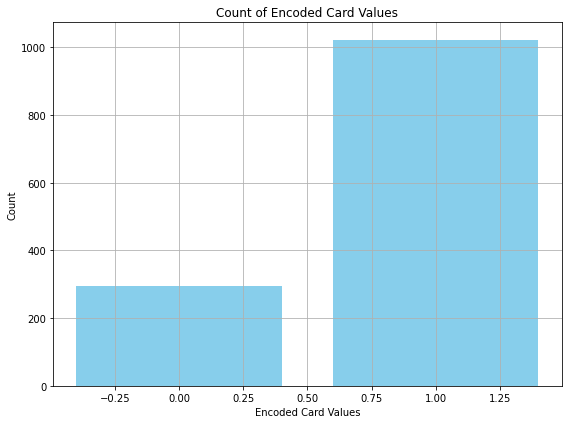

In [20]:
value_counts = df['card_encoded'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
plt.bar(value_counts.index, value_counts.values, color='skyblue')

# Add labels and title
plt.xlabel('Encoded Card Values')
plt.ylabel('Count')
plt.title('Count of Encoded Card Values')

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

So We can see that our dataset has a severe class imbalance, where the minority class (labelled '0') is much less frequent than the majority class (labelled '1').

Random Forest can indeed handle class imbalance to a certain extent. The decision trees within a Random Forest are individually constructed using a bootstrap sample (i.e., a random sample with replacement) from the training data. This process inherently provides some level of variation among the trees in the forest, which can help in learning from the minority class.

To improve the performance of a Random Forest model on such skewed datasets we can resample our dataset, Adjust class Weights , Customize Threshhold.etc

We would try to improve our model in Hyperparameter_Tuning.

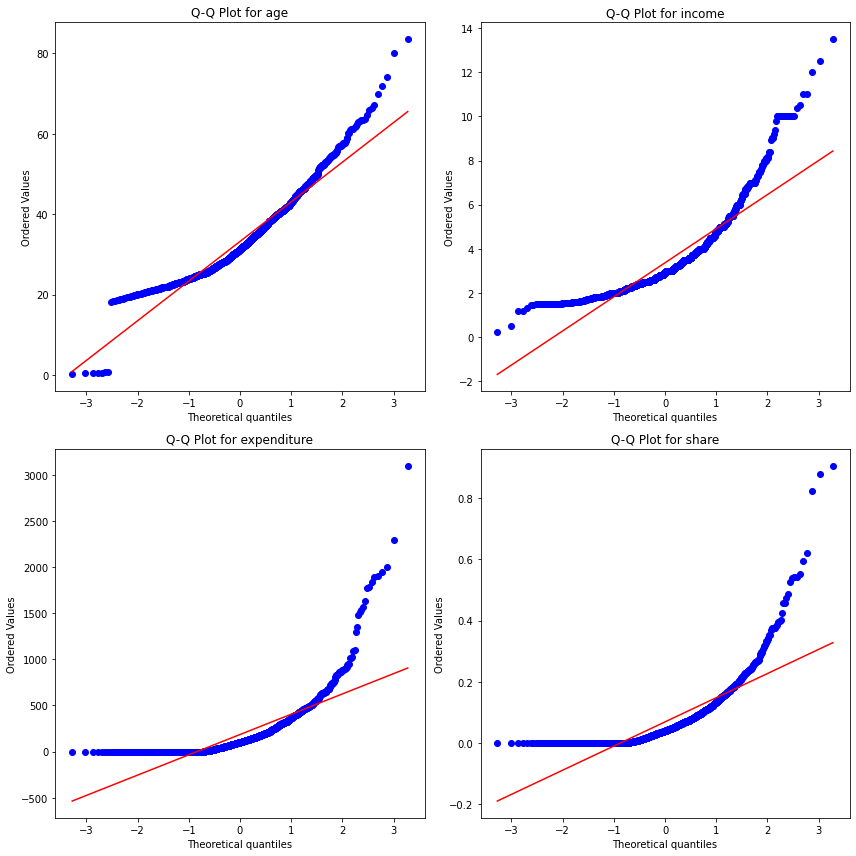

In [21]:
import scipy.stats as stats
columns = ['age', 'income', 'expenditure','share']
num_rows=2
# Subplots for QQ plot
fig, axes = plt.subplots(2, 2, figsize=(12, 12))
if num_rows > 1:
    axes = axes.flatten()
#Plot Q-Q plot
for i, column in enumerate(columns):
    stats.probplot(df[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q Plot for {column}')

plt.tight_layout()
plt.show()

In [22]:
##We can See that most of the data is Right-Skewed

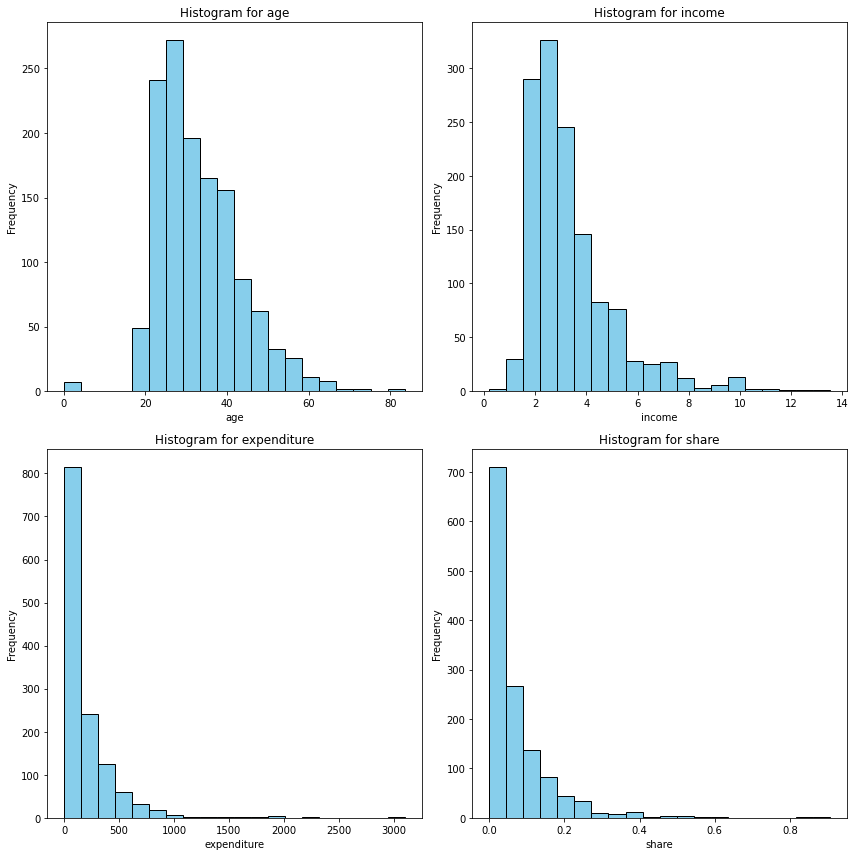

In [23]:
import matplotlib.pyplot as plt

# Columns to plot
columns = ['age', 'income', 'expenditure','share']
fig, axes = plt.subplots(2, 2, figsize=(12,12))
if num_rows > 1:
    axes = axes.flatten()
#plot histogram
for i, column in enumerate(columns):
    ax = axes[i]
    ax.hist(df[column], bins=20, color='skyblue', edgecolor='black')
    ax.set_title(f'Histogram for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()

The major portion of Data Is Right Skewed so how to mitigate the effects of skewness on Ml Model we could use:
1) Apply tranformation like log,  Squareroot, or Box-Cox transformation 

2) Remove outliers

3) Use othere important Features

The skewness of feature distributions is an important factor to consider when working with Random Forest models in machine learning. 

Although Random Forest, a non-linear ensemble method, is quite robust to skewed data, extreme skewness can nonetheless introduce certain challenges. 

Features with right-skewed distributions may lead to biased binary splits, as the majority of data points could fall into a single split, reducing the split's effectiveness. This skewness can also affect the Random Forest's feature importance metrics, potentially underestimating or overestimating a feature's predictive power based on its distribution. 



#### PCA is typically unnecessary when using Random Forest.

Random Forest, an ensemble learning method, constructs multiple decision trees during training and generates predictions by averaging individual tree predictions (for regression) or determining the mode of classes (for classification). Due to its ensemble approach, Random Forest effectively handles high-dimensional data without requiring dimensionality reduction techniques like PCA.

PCA is commonly employed when dealing with datasets containing numerous features, some of which may be redundant or correlated, leading to multicollinearity issues. PCA aims to reduce dimensionality by transforming data into a new set of uncorrelated variables known as principal components, potentially improving the performance of algorithms sensitive to high dimensionality or multicollinearity, such as linear regression or neural networks.

However, Random Forest is less affected by multicollinearity and high-dimensional data compared to other algorithms. Its inherent randomness in building decision trees with subsets of features and data points makes it robust against noise and overfitting, often rendering explicit dimensionality reduction techniques like PCA unnecessary.

In [24]:
#sns.pairplot(df, hue="card_encoded")
#plt.show()

In [25]:
### We wont be need of PCA as we are using Random Forest.

#### Splitting the Data

In [26]:
df

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_encoded,selfemp_encoded,card_encoded
0,0,37.66667,4.5200,0.033270,124.983300,3,54,1,12,1,0,1
1,0,33.25000,2.4200,0.005217,9.854167,3,34,1,13,0,0,1
2,0,33.66667,4.5000,0.004156,15.000000,4,58,1,5,1,0,1
3,0,30.50000,2.5400,0.065214,137.869200,0,25,1,7,0,0,1
4,0,32.16667,9.7867,0.067051,546.503300,2,64,1,5,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,0,33.58333,4.5660,0.002146,7.333333,0,94,1,19,1,0,1
1315,5,23.91667,3.1920,0.000376,0.000000,3,12,1,5,0,0,0
1316,0,40.58333,4.6000,0.026513,101.298300,2,1,1,2,1,0,1
1317,0,32.83333,3.7000,0.008999,26.996670,0,60,1,7,0,1,1


In [27]:
X = df.drop(['card_encoded'], axis=1)
y = df['card_encoded']

#### Split data into separate training and test set

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [29]:
X_train.head()

,reports,age,income,share,expenditure,dependents,months,majorcards,active,owner_encoded,selfemp_encoded
1093,0,56.00000,1.45,0.000828,0.0000,0,242,1,4,1,0
1166,0,31.91667,4.07,0.068857,233.0417,0,12,1,14,0,0
1309,1,40.16667,2.00,0.254827,424.6292,1,121,1,10,1,0
528,0,30.33333,2.60,0.295686,640.6533,0,25,1,4,1,0
3,0,30.50000,2.54,0.065214,137.8692,0,25,1,7,0,0


In [30]:
cols = X_train.columns
cols

Index(['reports', 'age', 'income', 'share', 'expenditure', 'dependents',
       'months', 'majorcards', 'active', 'owner_encoded', 'selfemp_encoded'],
      dtype='object')

As Random Forests are ensemble methods based on decision trees, and decision trees are not affected by the scale of the features.

Decision trees make splits based on feature thresholds, and the relative ordering of these thresholds remains unchanged regardless of feature scaling. 

Each decision tree in a Random Forest operates independently of others, so feature scaling does not affect their decisions. 

In [31]:
from sklearn.preprocessing import RobustScaler

#bust Still for practie purpose we would apply Sacler method yet it is not necessary.
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

#### Random Forest Classifier model with default parameters

In [32]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score


# instantiate the classifier 
rfc = RandomForestClassifier(random_state=42,n_jobs=-1, max_depth=5,oob_score=True)

# fit the model
rfc.fit(X_train, y_train)

# Predict the Test set results
y_pred = rfc.predict(X_test)

# Check accuracy score 

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9771


In [33]:
# Calculate probabilities for positive class
y_probs = rfc.predict_proba(X_test)[:, 1]

# Calculate area under ROC curve
roc_auc = roc_auc_score(y_test, y_probs)

print('Area under ROC curve: {0:0.4f}'.format(roc_auc))

Area under ROC curve: 0.9977


### Random Forest Classifier model with 1000 Decision Trees

In [34]:
rfc_100 = RandomForestClassifier(n_estimators=1000, random_state=42)

# fit the model to the training set
rfc_100.fit(X_train, y_train)

# Predict on the test set results
y_pred_100 = rfc_100.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9771


In [35]:
feature_scores = pd.Series(rfc.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

share              0.459572
expenditure        0.420363
reports            0.065281
income             0.016881
active             0.012816
age                0.009819
months             0.007550
owner_encoded      0.002996
dependents         0.002475
majorcards         0.001721
selfemp_encoded    0.000528
dtype: float64

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

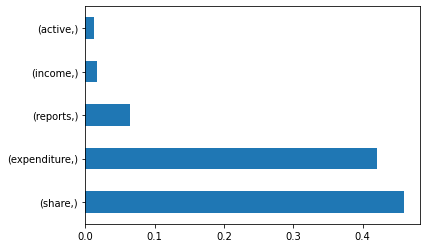

In [37]:
importance = pd.Series(rfc.feature_importances_,
                       index = X_train.columns.values)
importance.nlargest(5).plot(kind='barh',
                            figsize = (6,4));

### Confusion matrix

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', cm)

Confusion matrix

 [[ 96   0]
 [ 10 330]]


### Classification Report

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        96
           1       1.00      0.97      0.99       340

    accuracy                           0.98       436
   macro avg       0.95      0.99      0.97       436
weighted avg       0.98      0.98      0.98       436



The OOB score in a random forest is a measure of how well the model performs on unseen data. It's calculated by using the data points that were not used to train each individual tree in the forest. This score helps estimate the model's accuracy without needing a separate validation set, making it a convenient internal validation metric during training.

Thus in our model we have not created another Validation Set.

In [40]:
# checking the oob score
rfc.oob_score_

0.9852774631936579

In [41]:
# Without hyperparameters
TP_without_hyper = cm[0, 0]
FP_without_hyper = cm[0, 1]
TN_without_hyper = cm[1, 1]
FN_without_hyper = cm[1, 0]

accuracy_without_hyper = (TP_without_hyper + TN_without_hyper) / (TP_without_hyper + TN_without_hyper + FP_without_hyper + FN_without_hyper)

precision_0_without_hyper = TN_without_hyper / (TN_without_hyper + FN_without_hyper)
precision_1_without_hyper = TP_without_hyper / (TP_without_hyper + FP_without_hyper)

recall_0_without_hyper = TN_without_hyper / (TN_without_hyper + FP_without_hyper) 
recall_1_without_hyper = TP_without_hyper / (TP_without_hyper + FN_without_hyper)

f1_score_1_without_hyper = 2 * (precision_1_without_hyper * recall_1_without_hyper) / (precision_1_without_hyper + recall_1_without_hyper)
f1_score_0_without_hyper = 2 * (precision_0_without_hyper * recall_0_without_hyper) / (precision_0_without_hyper + recall_0_without_hyper)


# Print the results
print("Without hyperparameters:\n")
print(f"True positives (TP) = {TP_without_hyper}\n"
      f"False positives (FP) = {FP_without_hyper}\n"
      f"True negatives (TN) = {TN_without_hyper}\n"
      f"False negatives (FN) = {FN_without_hyper}\n"
      f"Accuracy: {accuracy_without_hyper:.0%}\n"
      
           f"Precision (Class 0): {precision_0_without_hyper:.0%}\n"
      f"Precision (Class 1): {precision_1_without_hyper:.0%}\n"
 
      f"Recall (Class 0): {recall_0_without_hyper:.0%}\n"
       f"Recall (Class 1): {recall_1_without_hyper:.0%}\n"
      
       f"F1-score (Class 0): {f1_score_0_without_hyper:.0%}\n"
       f"F1-score (Class 1): {f1_score_1_without_hyper:.0%}\n"
     
      )


Without hyperparameters:

True positives (TP) = 96
False positives (FP) = 0
True negatives (TN) = 330
False negatives (FN) = 10
Accuracy: 98%
Precision (Class 0): 97%
Precision (Class 1): 100%
Recall (Class 0): 100%
Recall (Class 1): 91%
F1-score (Class 0): 99%
F1-score (Class 1): 95%



### Lets Do Hyperparameter Tuning

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
import warnings

In [46]:
rfc_hyper=RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
    'max_depth': [2,3,5,10,20],
    'max_features': ['auto', 'sqrt'],
    'criterion': ['gini', 'entropy'],
    'max_leaf_nodes': [None, 10, 20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'class_weight': [ 'balanced'],  #As our data is Highly imbalanced we would need to include the Balanced creteria
    'n_estimators': [10,25,30,50,100,200],
    'random_state': [42],
    'oob_score': [True, False]
}

1. **max_depth**: Determines the maximum depth of each tree in the forest, controlling the complexity of the model and its ability to capture intricate patterns in the data.

2. **max_features**: Specifies the maximum number of features to consider when looking for the best split at each node, influencing the diversity and randomness of individual trees in the forest.

3. **criterion**: Defines the function to measure the quality of a split, either 'gini' for Gini impurity or 'entropy' for information gain, impacting the decision-making process at each node.

4. **max_leaf_nodes**: Sets the maximum number of leaf nodes allowed in each tree, regulating the model's capacity to generalize and avoid overfitting.

5. **min_samples_leaf**: Determines the minimum number of samples required to be at a leaf node, controlling the tree's depth and preventing the creation of nodes with too few instances.

6. **class_weight**: Balances the contribution of different classes in the training data, addressing the issue of class imbalance by assigning higher weights to minority classes.

7. **n_estimators**: Specifies the number of trees in the forest, influencing the overall complexity and performance of the model through ensemble averaging.

8. **random_state**: Provides a seed value for random number generation, ensuring reproducibility of the results across different runs and facilitating model comparison and debugging.

9. **oob_score**: Indicates whether to use out-of-bag samples for estimating the model's performance, serving as a convenient internal validation metric during training without requiring a separate validation set.

In [47]:
%%time
# Ignore all warnings
warnings.filterwarnings("ignore")
# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rfc_hyper, param_grid=params, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the grid search to your training data
grid_search.fit(X_train, y_train)

CPU times: total: 20.8 s
Wall time: 7min 33s


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced'],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'max_leaf_nodes': [None, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200],
                         'oob_score': [True, False], 'random_state': [42]},
             scoring='accuracy')

The difference between parameters and hyperparameters is that the hyperparameters are set before training the model. The parameters are the final result of the training. It is the job of the algorithm to find the best parameters for the model. It is the job of the user to find the best algorithm and associated hyperparameters.

The most fundamental hyperparameters for the RandomForest are max_depth and n_estimators. Indeed the RandomForest is one of my favorite estimators because, surprisingly, one  cannot overfit by having too many trees in a Random forest, so one do not need to worry too much about the n_estimators parameter. Another important hyperparameter is min_samples_leaf; if one has too few samples in a leaf then one very much runs the risk of overfitting.

In [48]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'n_estimators': 200, 'oob_score': True, 'random_state': 42}
Best Score: 0.9852850539291218


In [49]:
%%time
# Ignore all warnings
warnings.filterwarnings("ignore")
best_rf_classifier = RandomForestClassifier(
    criterion='gini',
    max_depth=2,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_samples_leaf=5,
    class_weight='balanced',
    n_estimators=10,
    oob_score=True,
    random_state=42
)
# Fit the classifier to your training data
best_rf_classifier.fit(X_train, y_train)

Y_pred = best_rf_classifier.predict(X_test)

# Check accuracy score 
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, Y_pred)))

Model accuracy score with 100 decision-trees : 0.9748
CPU times: total: 0 ns
Wall time: 43.2 ms


In [50]:
from sklearn.metrics import confusion_matrix
cm1 = confusion_matrix(y_test, Y_pred)
print('Confusion matrix\n\n', cm1)

Confusion matrix

 [[ 95   1]
 [ 10 330]]


In [56]:
# With hyperparameters
TP_hyper = cm1[0, 0]
FP_hyper = cm1[0, 1]
TN_hyper = cm1[1, 1]
FN_hyper = cm1[1, 0]

accuracy_hyper = (TP_hyper + TN_hyper) / (TP_hyper + TN_hyper + FP_hyper + FN_hyper)

precision_1_hyper = TP_hyper / (TP_hyper + FP_hyper)
precision_0_hyper = TN_hyper / (TN_hyper + FN_hyper)

recall_0_hyper = TN_hyper / (TN_hyper + FP_hyper)  
recall_1_hyper = TP_hyper / (TP_hyper + FN_hyper)

f1_score_1_hyper = 2 * (precision_1_hyper * recall_1_hyper) / (precision_1_hyper + recall_1_hyper)
f1_score_0_hyper = 2 * (precision_0_hyper * recall_0_hyper) / (precision_0_hyper + recall_0_hyper)

print("With hyperparameters>:\n")
print(f"True positives (TP) = {TP_hyper}\n"
      f"False positives (FP) = {FP_hyper}\n"
      f"True negatives (TN) = {TN_hyper}\n"
      f"False negatives (FN) = {FN_hyper}\n"
      f"Accuracy: {accuracy_hyper:.0%}\n"
      
         f"Precision (Class 0): {precision_0_hyper:.0%}\n"
       f"Precision (Class 1): {precision_1_hyper:.0%}\n"
   
          f"Recall (Class 0): {recall_0_hyper:.0%}\n"
            f"Recall (Class 1): {recall_1_hyper:.0%}\n"
  
      f"F1-score (Class 0): {f1_score_0_hyper:.0%}\n"
      f"F1-score (Class 1): {f1_score_1_hyper:.0%}\n\n\n"
    
      )

With hyperparameters>:

True positives (TP) = 95
False positives (FP) = 1
True negatives (TN) = 330
False negatives (FN) = 10
Accuracy: 97%
Precision (Class 0): 97%
Precision (Class 1): 99%
Recall (Class 0): 100%
Recall (Class 1): 90%
F1-score (Class 0): 98%
F1-score (Class 1): 95%





### Now, let’s visualize

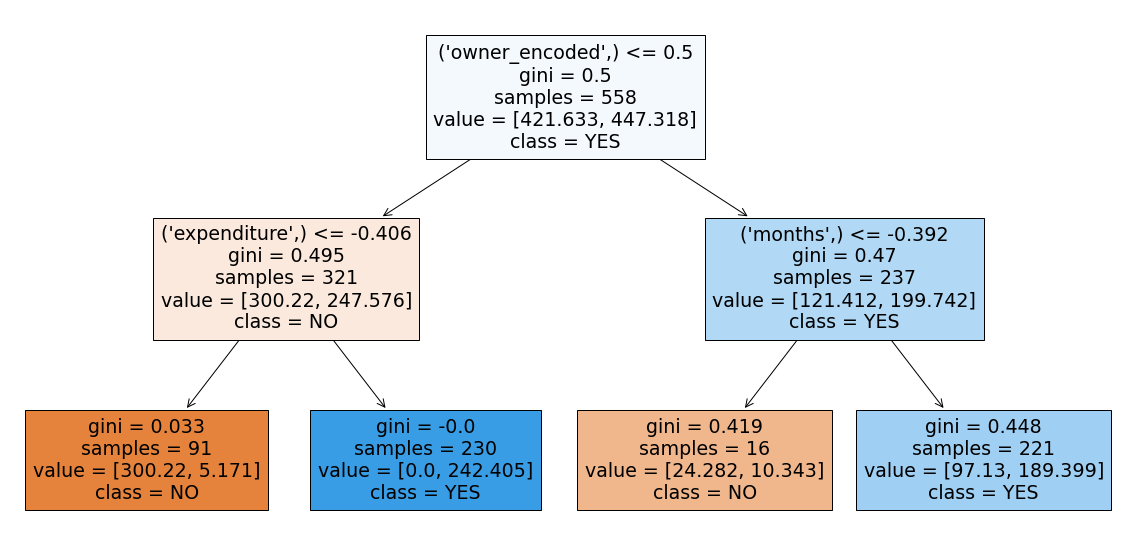

In [51]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(best_rf_classifier.estimators_[0], feature_names=X_train.columns, class_names=['NO', 'YES'], filled=True)
plt.show()

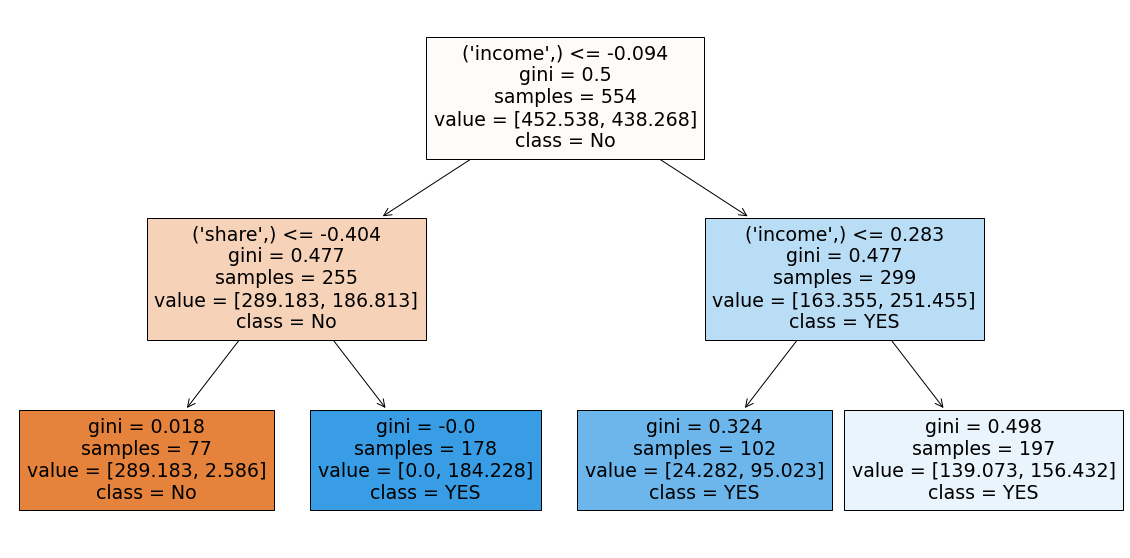

In [52]:
plt.figure(figsize=(20,10))  # Set the figure size
plot_tree(best_rf_classifier.estimators_[5], feature_names=X_train.columns, class_names=['No', 'YES'], filled=True)
plt.show()

The trees created by estimators_[0] and estimators_[5] are different. Thus we can say that each tree is independent of the other.

In [53]:
best_rf_classifier.feature_importances_

array([9.99451812e-02, 4.28765467e-05, 3.83672164e-02, 4.77344049e-01,
       3.48539177e-01, 0.00000000e+00, 2.73952130e-02, 1.26313163e-05,
       4.18939205e-03, 4.16426322e-03, 0.00000000e+00])

In [54]:
X_train.columns

MultiIndex([(        'reports',),
            (            'age',),
            (         'income',),
            (          'share',),
            (    'expenditure',),
            (     'dependents',),
            (         'months',),
            (     'majorcards',),
            (         'active',),
            (  'owner_encoded',),
            ('selfemp_encoded',)],
           )

In [55]:
feature_scores1 = pd.Series(best_rf_classifier.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores1

share              0.477344
expenditure        0.348539
reports            0.099945
income             0.038367
months             0.027395
active             0.004189
owner_encoded      0.004164
age                0.000043
majorcards         0.000013
dependents         0.000000
selfemp_encoded    0.000000
dtype: float64

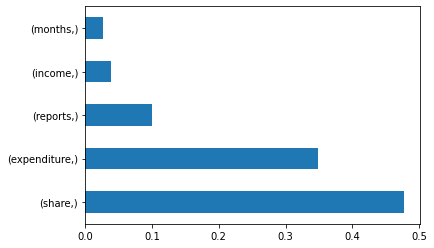

In [57]:
importance_para = pd.Series(best_rf_classifier.feature_importances_,
                       index = X_train.columns.values)
importance_para.nlargest(5).plot(kind='barh',
                            figsize = (6,4));


| Decision Trees                             | Random Forests                                    |
|--------------------------------------------|---------------------------------------------------|
| Simple, interpretable models               | Ensemble method combining multiple decision trees 
|
| Can overfit with complex datasets          | Reduces overfitting through ensemble averaging  
|
| Prone to high variance                     | Lowers variance by averaging predictions       
|
| May lack generalization on unseen data     | Improves generalization with ensemble learning 
|
| Sensitive to small changes in the data     | Robust to noise and outliers due to averaging 
|
| Can capture complex relationships          | Handles high-dimensional data effectively   
|
| Each tree trained independently            | Trees trained in parallel, improving efficiency   |


### Important Features of Random Forest

1. **Diversity:** Each tree in a random forest is constructed using a random subset of attributes, leading to diverse trees that capture different aspects of the data.

2. **Immunity to Dimensionality:** Random forests are robust to the curse of dimensionality because not all features are considered in each tree, reducing the feature space and preventing issues associated with high-dimensional data.

3. **Parallelization:** The construction of each tree in a random forest can be performed independently, enabling efficient use of computational resources by utilizing parallel processing, which speeds up the training process.

4. **Train-Test Split Not Required:** Random forests inherently incorporate an out-of-bag (OOB) error estimation, meaning that a portion of the data (typically around 30%) is not used to train any particular tree. This allows for effective model evaluation without explicitly segregating data into separate training and testing sets.

5. **Stability:** Random forests produce stable predictions by aggregating the results of multiple trees through methods like majority voting or averaging, which reduces the influence of outliers or noise in the data and enhances overall robustness.

6. **Out-of-Bag (OOB) Error Estimate:** Random Forest can provide an internal validation mechanism through the out-of-bag error estimate, which is a mean prediction error from each training sample using only the trees that did not have the sample in their bootstrap sample.